In [ ]:
import Demo
import Graphics.Color.Space
import Graphics.Color.Space.CIE1976.LAB

In [37]:
ColorLAB 50.209 (-53.031) 41.386

: 

In [38]:
import Graphics.Color.Illuminant.CIE1931
:set -XDataKinds

pureGreen = ColorLAB 50.209 (-53.031) 41.386 :: Color (LAB 'D50) Float
print pureGreen

<LAB CIE1931 'D50:(50.209000,-53.031000,41.386000)>

In [39]:
import Graphics.Color.Space.RGB.Derived.SRGB as Derived

convertColor pureGreen :: Color (Derived.SRGB 'D65) Float

: 

In [42]:
import Graphics.Color.Adaptation

convert pureGreen :: Color (Derived.SRGB 'D65) Word8

<SRGB CIE1931 'D65:(  0,140, 38)>

In [41]:
:t convertColor
:t convert

convertColor :: forall cs' i e cs. (ColorSpace cs' i e, ColorSpace cs i e) => Color cs' e -> Color cs e

convert :: forall cs' i' e' cs i e. (ColorSpace cs' i' e', ColorSpace cs i e) => Color cs' e' -> Color cs e

In [43]:
convertWith ciecam02Adaptation pureGreen :: Color (Derived.SRGB 'D65) Float
convertWith fairchildAdaptation pureGreen :: Color (Derived.SRGB 'D65) Float

<SRGB CIE1931 'D65:(-0.240814, 0.548256, 0.166010)>

<SRGB CIE1931 'D65:(-0.231693, 0.547917, 0.157562)>

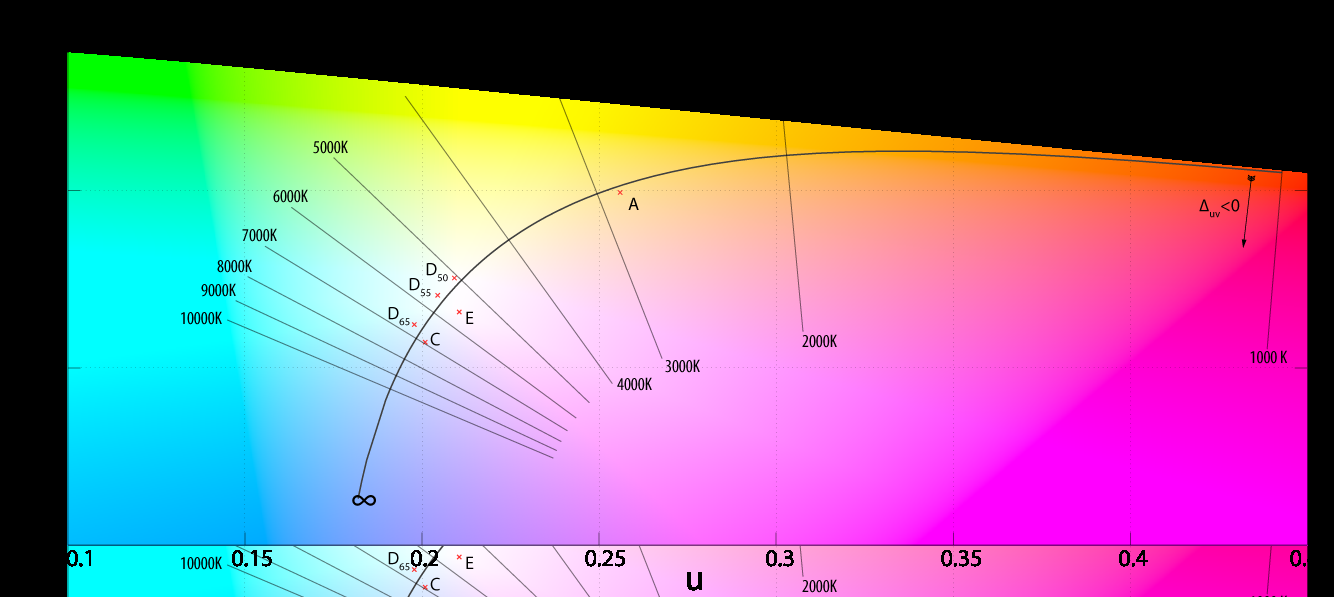

In [44]:
import qualified Data.Massiv.Array as A
import qualified Data.Massiv.Array.IO as A
import Graphics.Color.Space.RGB.Alternative.HSV
import Graphics.Color.Space.RGB.SRGB as Standard

locus <- A.readImageAuto "Planckian-locus.png" :: IO (A.Image A.S (Alpha Standard.SRGB) Word8)
display locus